In [2]:
import json
import matplotlib.pyplot as plt

In [12]:
# SUPERVISED LEARNING
# sl-abot
json_sl_abot_train = json.load(open('plot_data/json_sl_abot/train_vis.json'))
json_sl_abot_eval = json.load(open('plot_data/json_sl_abot/abot_vis_val.json'))

# sl-qbot
json_sl_qbot_train = json.load(open('plot_data/json_sl_qbot/train_vis.json'))
json_sl_qbot_eval = json.load(open('plot_data/json_sl_qbot/qbot_vis_val.json'))

# REINFORCEMENT LEARNING
# RL LEVENSHTEIN
json_rl_leven_train = json.load(open('plot_data/json_rl_leven/train_vis.json'))
json_rl_leven_abot_eval = json.load(open('plot_data/json_rl_leven/abot_vis_val.json'))
json_rl_leven_qbot_eval = json.load(open('plot_data/json_rl_leven/qbot_vis_val.json'))

# RL ROUGE
json_rl_rouge_train = json.load(open('plot_data/json_rl_rouge/train_vis.json'))
json_rl_rouge_abot_eval = json.load(open('plot_data/json_rl_rouge/abot_vis_val.json'))
json_rl_rouge_qbot_eval = json.load(open('plot_data/json_rl_rouge/qbot_vis_val.json'))

# RL WORD2VEC
json_rl_word2vec_train = json.load(open('plot_data/json_rl_word2vec/train_vis.json'))
json_rl_word2vec_abot_eval = json.load(open('plot_data/json_rl_word2vec/abot_vis_val.json'))
json_rl_word2vec_qbot_eval = json.load(open('plot_data/json_rl_word2vec/qbot_vis_val.json'))

# RL SELF-CRITIC
json_rl_self_train = json.load(open('plot_data/json_rl_self/train_vis.json'))
json_rl_self_abot_eval = json.load(open('plot_data/json_rl_self/abot_vis_val.json'))
json_rl_self_qbot_eval = json.load(open('plot_data/json_rl_self/qbot_vis_val.json'))

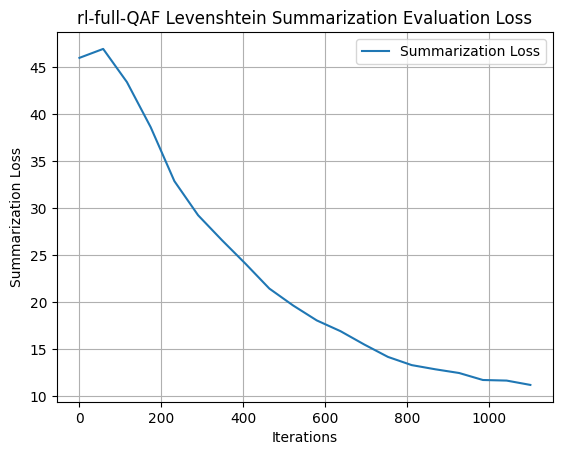

In [65]:
# Simple Plots

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(json_rl_leven_qbot_eval['iterIds'], json_rl_leven_qbot_eval['summLossMean'], label='Summarization Loss')
ax.set(ylabel='Summarization Loss', xlabel='Iterations', title='rl-full-QAF Levenshtein Summarization Evaluation Loss')
ax.grid()
    
plt.legend()
    
plt.show()

In [27]:
print(len(json_rl_leven_train['aBotLoss']))

56


In [47]:
json_sl_abot_train['iterIds'][:-len(json_rl_rouge_train['iterIds'])][-1]

3460

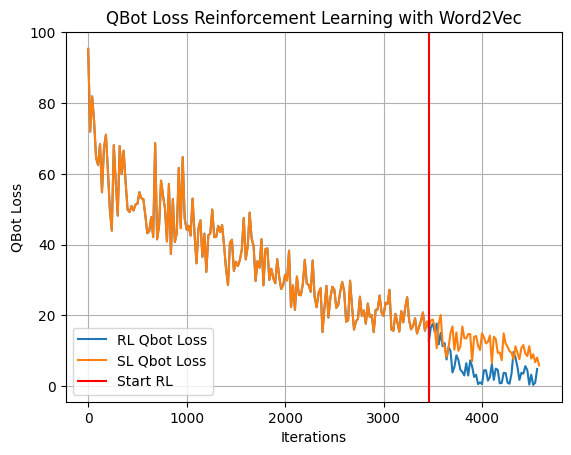

In [58]:
# Multi-Plots


rl_iters = []
for iter in json_rl_word2vec_train['iterIds']:
    rl_iters.append(iter + 3460)
iters_custom = json_sl_qbot_train['iterIds'][:-len(rl_iters)] + rl_iters


x = iters_custom
y = json_sl_qbot_train['qBotLoss'][:-len(rl_iters)] + json_rl_word2vec_train['qBotLoss']


fig, ax = plt.subplots()

ax.plot(x, y, label='RL Qbot Loss')
ax.plot(json_sl_qbot_train['iterIds'], json_sl_qbot_train['qBotLoss'], label='SL Qbot Loss')
plt.axvline(x = 3460, color = 'r', label = 'Start RL')

ax.set(ylabel='QBot Loss', xlabel='Iterations', title='QBot Loss Reinforcement Learning with Word2Vec')
ax.grid()
    
plt.legend()
    
plt.show()